# Putting our pipeline together

We now have all the elements we need to come up with a final model, estimate its performance, and use it to make predictions about the data we have not labelled.

Running this pipeline on the full dataset is computationally intensive, so it is written as set of python scripts.

`run_full_pipeline.sh` will run the whole training, evaluation and prediction pipeline for each target variable(s). You can change the model name variable in the script to run the pipeline with different models

`pipeline_train.py` trains and evaluates a given model on a given target variable. It saves the final model, as well as evaluation scores and predictions made for the outer test sets in the `results` directory.

Run `python mlmap/pipeline_train.py -h` to see the possible arguments

`pipeline_predict.py` takes the saved model, and makes predictions for documents that do not have labels

## Trial data

In [1]:
import os
os.chdir('../../../')

The results of our trials are stored in `results/trials.db`. We can inspect these as follows:

In [2]:
from mlmap import return_search
db = "results/trials.db"
model_name = "distilroberta-base"
y_prefix = "INCLUDE"
study_name = f"{model_name}__{y_prefix}"
df = return_search(db, study_name)
# Number of trials completed
print(df.number.unique().shape[0])
df.head()

/home/galm/Documents/ml-map/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


25


,study_id,study_name,trial_id,number,value,param_name,param_value
0,28,distilroberta-base__INCLUDE__0,75,0,0.741825,learning_rate,0.000103
1,28,distilroberta-base__INCLUDE__0,75,0,0.741825,num_train_epochs,3.000000
2,28,distilroberta-base__INCLUDE__0,75,0,0.741825,per_device_train_batch_size,1.000000
3,28,distilroberta-base__INCLUDE__0,75,0,0.741825,use_class_weights,0.000000
4,28,distilroberta-base__INCLUDE__0,75,0,0.741825,weight_decay,0.158371


We can see how long it took to get to the highest value in our set of trials in each outer fold

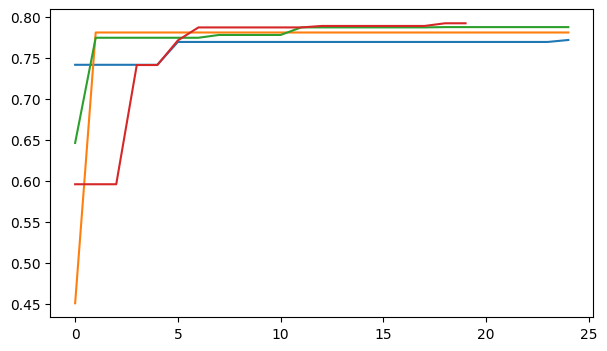

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,4))
for fold, group in df.groupby("study_name"):
    f1_max = group.groupby('number')['value'].max().cummax()
    ax.plot(f1_max)

## Final model performance

## Predictions